# Задача 1.

$\text{Пусть} \; n = 100, \; k = 4, \; m = 95, \; A = \{\text{все такие исходы, что ни один товар не забракуют}\}. Тогда: $
$$ P(A) = \frac{\binom{m}{k}}{\binom{n}{k}} = \frac{m!\;k!\;(n - k)!}{k!\;(m - k)!\;n!} = 
\frac{(m - k + 1) \; \cdot \; ... \; \cdot m}{(n - k + 1)\; \; \cdot \; ... \; \cdot n} = \frac{92 \; \cdot \; ... \; 95}{97 \; \cdot \; ... \; 100} \approx 0,812$$


# Задача 2.

$Пусть \; y_i - время, \; которое \; Алиса \; потратила \; в \; i$-ю $неделю$.
$$
f \left (y \right ) = \begin{cases}
\theta e^{- \theta y} & \text{ if } y \geqslant 0 \\ 
0 & \text{ if } y < 0 \ 
\end{cases}
; \; \hat{\theta}_{ML} = \; ?$$, где $f$ - плотность вероятности, $\hat{\theta}_{ML}$ - оценка максимального правдоподобия.
$$
f(y_1, ... , y_5| \theta) = \{ так\; как \; наблюдения \; независимы\} = \prod_{i=1}^{5} f(y_i | \theta) \rightarrow \underset{\theta}{max} \;
 \Leftrightarrow \; ln(\prod_{i=1}^{5} f(y_i | \theta)) = \sum_{i=1}^{5} ln(f(y_i | \theta)) \rightarrow \underset{\theta}{max}$$ 

Пусть $l$ - логарифм функции правдоподобия, тогда:

$$
l(\theta) = \sum_{i=1}^{5} ln(\theta e^{- \theta y_i}) = \sum_{i=1}^{5} (ln \theta - \theta y_i) = 5 ln \theta - \theta \sum_{i=1}^{5}y_i
$$
$$
\frac{\partial l(\theta)}{\partial \theta} = \frac{5}{\theta} - \sum_{i=0}^{5} y_i \Rightarrow  \hat{\theta} = \frac{5}{\sum_{i=1}^{5} y_i} = \frac{5}{70} \approx 0,07
$$

# Задача 3.

Имеется информация по клиентам (выборка для разработки appl_score_sample.csv) \
Необходимо любым способом (на выбор кандидата) с наибольшей точностью с помощью этой информации спрогнозировать целевой признак Тarget (бинарный признак 1/0). 

**Описания полей**

* CLIENT_ID - ID клиента 
* SEX - пол (0 - женский, 1 - мужской)
* CHILD_FLAG - признак наличия детей (1/0-есть/нет) 
* REALTY_FLAG - признак наличия недвижимости (1/0-есть/нет) 
* ACCOUNTS_FLAG - признак счета в Банке (1/0-есть/нет)
* E_MAIL_FLAG - признак наличия электронной почты (1/0-есть/нет)
* DCI - доход в руб.
* PROFIT_FAMILY - доход семьи в руб.
* UCI - доход по неосновному месту работы в руб. 
* FOREIGN_PASSPORT_FLAG - признак наличия паспорта (1/0-есть/нет) 
* STANDING_IN_MONTHS_LAST - стаж работы на последнем месте работы в мес. 
* EDUCATION - образование 
* TRANSPORT_AMOUNT - количество ТС в собственности
* Target - целевой признак (который нужно предсказать)

**EDUCATION**

* **1** - ученая степень/MBA
* **2** - второе высшее
* **3** - высшее;
* **4** - неоконченное высшее;
* **5** - - среднее специальное
* **6** - среднее;
* **7** - ниже среднего;
* **-1** - не указано



**ДОБАВЬ СЮДА ОПИСАНИЙ ПАЙПЛАЙНА**

## Импорт библиотек

In [1]:
%%capture
!pip install pandasql

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from time import process_time
from time import time

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import ttest_ind

from xgboost import XGBClassifier, XGBRegressor

import pandasql as ps

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore");

## Подгрузка данных

In [3]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Interview_Tasks/Credit_Risk_Modeling"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Interview_Tasks/Credit_Risk_Modeling


In [4]:
!pwd

/content/drive/MyDrive/Interview_Tasks/Credit_Risk_Modeling


In [5]:
data = pd.read_csv('appl_score_sample.csv', sep=';')

In [6]:
data.dtypes

CLIENT_ID                    int64
SEX                          int64
CHILD_FLAG                   int64
REALTY_FLAG                  int64
ACCOUNTS_FLAG                int64
E_MAIL_FLAG                  int64
DCI                        float64
PROFIT_FAMILY              float64
UCI                        float64
FOREIGN_PASSPORT_FLAG        int64
STANDING_IN_MONTHS_LAST      int64
EDUCATION                    int64
TRANSPORT_AMOUNT             int64
Target                       int64
dtype: object

## Анализ датафрейма

In [7]:
data.sample(5)

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
920,921,0,0,1,1,0,0.0000,15733.04,0.0,0,0,5,0,1
528,529,1,1,0,0,0,8365.7197,45000.00,11000.0,0,38,6,0,1
10,11,1,0,1,0,0,16612.6309,25000.00,0.0,0,25,5,0,1
1023,1024,0,0,0,1,0,0.0000,12000.00,0.0,0,0,5,0,1
104,105,1,1,1,0,0,42393.4609,85000.00,15000.0,0,48,5,1,1


In [8]:
data.shape

(2163, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CLIENT_ID                2163 non-null   int64  
 1   SEX                      2163 non-null   int64  
 2   CHILD_FLAG               2163 non-null   int64  
 3   REALTY_FLAG              2163 non-null   int64  
 4   ACCOUNTS_FLAG            2163 non-null   int64  
 5   E_MAIL_FLAG              2163 non-null   int64  
 6   DCI                      2163 non-null   float64
 7   PROFIT_FAMILY            2163 non-null   float64
 8   UCI                      2163 non-null   float64
 9   FOREIGN_PASSPORT_FLAG    2163 non-null   int64  
 10  STANDING_IN_MONTHS_LAST  2163 non-null   int64  
 11  EDUCATION                2163 non-null   int64  
 12  TRANSPORT_AMOUNT         2163 non-null   int64  
 13  Target                   2163 non-null   int64  
dtypes: float64(3), int64(11)

In [10]:
data.describe()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
count,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2.163000e+03,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000
mean,1081.967638,0.492372,0.516412,0.491447,0.094313,0.243181,20564.292780,3.914511e+04,4280.912470,0.152566,49.841424,4.355062,0.230236,0.500231
std,624.494408,0.500057,0.501693,0.500042,0.292332,0.429103,31220.805618,8.471056e+04,13969.285081,0.359652,58.111000,1.166387,0.471845,0.500116
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,-3.000000,0.000000
25%,541.500000,0.000000,0.000000,0.000000,0.000000,0.000000,7713.285150,1.615797e+04,0.000000,0.000000,13.000000,3.000000,0.000000,0.000000
50%,1082.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13485.000000,2.685308e+04,0.000000,0.000000,31.000000,5.000000,0.000000,1.000000
75%,1622.500000,1.000000,1.000000,1.000000,0.000000,0.000000,23206.075200,4.199500e+04,3440.000000,0.000000,60.000000,5.000000,0.000000,1.000000
max,2162.000000,1.000000,1.000000,1.000000,1.000000,1.000000,707600.000000,2.699217e+06,300000.000000,1.000000,397.000000,7.000000,3.000000,1.000000


## Подготовка данных



### Удалим строки с "-1"

In [11]:
data.CHILD_FLAG.value_counts()

 1    1119
 0    1042
-1       2
Name: CHILD_FLAG, dtype: int64

In [12]:
data.CHILD_FLAG.mode()[0]

1

In [13]:
data.Target.value_counts()

1    1082
0    1081
Name: Target, dtype: int64

In [14]:
data.CLIENT_ID.value_counts()

2093    2
1       1
1445    1
1439    1
1440    1
       ..
716     1
715     1
714     1
713     1
2162    1
Name: CLIENT_ID, Length: 2162, dtype: int64

In [15]:
data.shape, data.drop_duplicates().shape

((2163, 14), (2163, 14))

In [16]:
data.query('`CLIENT_ID` == 2093')

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
2092,2093,1,1,0,0,0,25453.1191,30453.1191,5000.0,0,35,5,0,0
2093,2093,1,1,0,0,0,25453.1191,30453.1191,5000.0,0,35,5,0,1


In [17]:
data = data.drop(labels=[2092, 2093])

In [18]:
data.iloc[(data.values < 0).any(1)]

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
113,114,0,0,1,0,0,2617.3899,25000.0000,0.0,0,4,5,-2,1
220,221,1,1,1,0,0,5349.6299,5649.6299,300.0,0,96,5,-1,1
323,324,0,1,1,0,0,15433.0000,27433.0000,0.0,0,35,3,-3,1
498,499,1,0,0,0,0,8700.0000,28700.0000,20000.0,0,59,4,-1,1
549,550,1,-1,0,0,0,0.0000,0.0000,0.0,0,0,6,0,1
655,656,1,1,0,0,0,14813.5898,40000.0000,0.0,0,17,5,-2,1
811,812,1,0,0,1,0,0.0000,24000.0000,0.0,0,0,5,-1,1
1938,1939,0,-1,0,0,1,0.0000,0.0000,0.0,0,0,5,0,0


In [19]:
data = data.query('`TRANSPORT_AMOUNT` >= 0')

In [20]:
data.iloc[(data.values < 0).any(1)]

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
549,550,1,-1,0,0,0,0.0,0.0,0.0,0,0,6,0,1
1938,1939,0,-1,0,0,1,0.0,0.0,0.0,0,0,5,0,0


In [21]:
data = data.query('`CHILD_FLAG` >= 0')

### EDA

In [22]:
df = data.copy()

In [23]:
df.dtypes

CLIENT_ID                    int64
SEX                          int64
CHILD_FLAG                   int64
REALTY_FLAG                  int64
ACCOUNTS_FLAG                int64
E_MAIL_FLAG                  int64
DCI                        float64
PROFIT_FAMILY              float64
UCI                        float64
FOREIGN_PASSPORT_FLAG        int64
STANDING_IN_MONTHS_LAST      int64
EDUCATION                    int64
TRANSPORT_AMOUNT             int64
Target                       int64
dtype: object

In [24]:
df.nunique().sort_values()

SEX                           2
CHILD_FLAG                    2
REALTY_FLAG                   2
ACCOUNTS_FLAG                 2
E_MAIL_FLAG                   2
FOREIGN_PASSPORT_FLAG         2
Target                        2
TRANSPORT_AMOUNT              4
EDUCATION                     7
UCI                         123
STANDING_IN_MONTHS_LAST     237
PROFIT_FAMILY              1289
DCI                        1817
CLIENT_ID                  2153
dtype: int64

In [25]:
def displot_for_target(df, feature):
    sns.displot(
        {
            "Target 0": df[df.Target == 0][feature],
            "Target 1": df[df.Target == 1][feature]
        },
        kind="kde",
        common_norm=False # независимая нормализация каждого подмножества
    )

    plt.title(feature, fontsize=20)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Dentsity', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

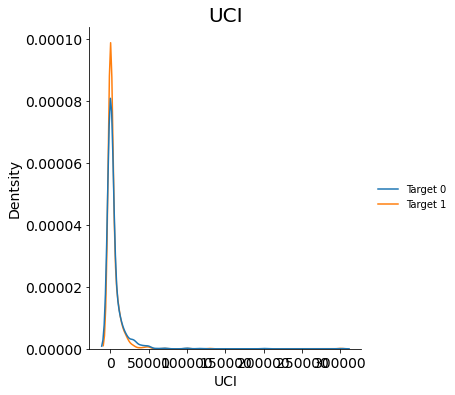

In [26]:
displot_for_target(df, 'UCI')

In [27]:
# df.UCI = np.log(df.UCI+1)

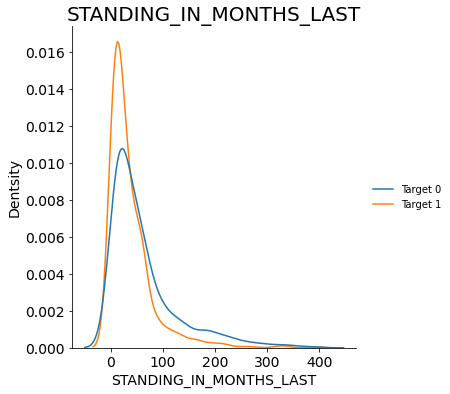

In [28]:
displot_for_target(df, 'STANDING_IN_MONTHS_LAST')

In [29]:
# df.STANDING_IN_MONTHS_LAST = np.log(df.STANDING_IN_MONTHS_LAST+1)

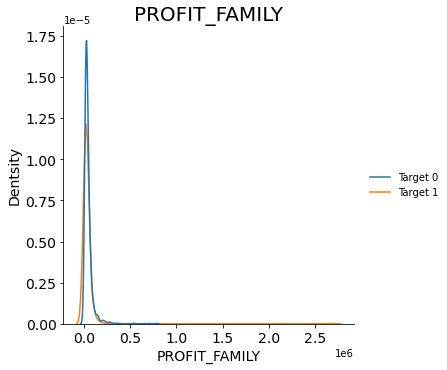

In [30]:
displot_for_target(df, 'PROFIT_FAMILY')

In [31]:
# df.PROFIT_FAMILY = np.log(df.PROFIT_FAMILY+1)

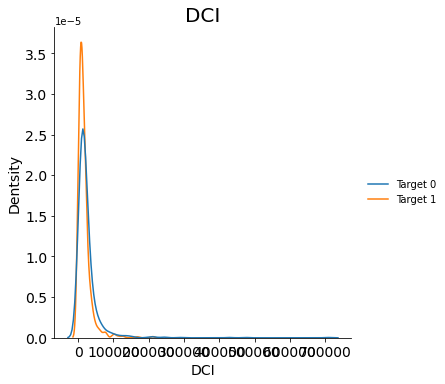

In [32]:
displot_for_target(df, 'DCI')

In [33]:
# df.DCI = np.log(df.DCI+1)

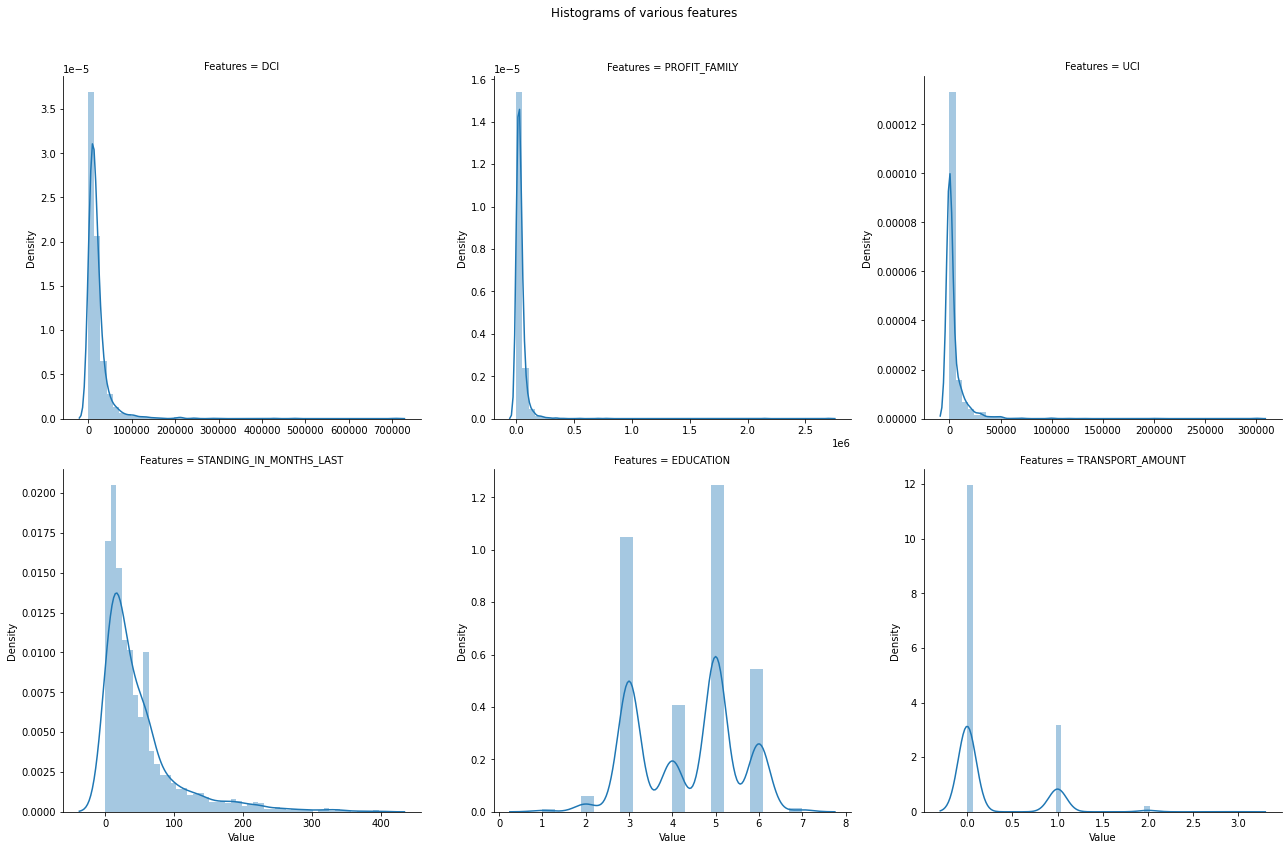

In [34]:
num_cols = ['DCI', 'PROFIT_FAMILY', 'UCI', 'STANDING_IN_MONTHS_LAST', 'EDUCATION', 'TRANSPORT_AMOUNT']

numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False, height=6)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [35]:
df.TRANSPORT_AMOUNT.unique(), df.EDUCATION.unique()

(array([1, 2, 0, 3]), array([3, 5, 6, 4, 2, 7, 1]))

In [36]:
def displot_by_value(df, feature, cut_by_value):
    cut_by_values = df[cut_by_value].unique()
    keys = [str(cut_by_value) + " " + str(cut_val) for cut_val in cut_by_values]
    values = [df[df[cut_by_value] == cut_val][feature] for cut_val in cut_by_values]
    sns.displot(
        dict(zip(keys, values)),
        kind="kde",
        common_norm=False # независимая нормализация каждого подмножества
    )

    plt.title(feature + '-' + cut_by_value, fontsize=20)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Dentsity', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

In [37]:
df.nunique()

CLIENT_ID                  2153
SEX                           2
CHILD_FLAG                    2
REALTY_FLAG                   2
ACCOUNTS_FLAG                 2
E_MAIL_FLAG                   2
DCI                        1817
PROFIT_FAMILY              1289
UCI                         123
FOREIGN_PASSPORT_FLAG         2
STANDING_IN_MONTHS_LAST     237
EDUCATION                     7
TRANSPORT_AMOUNT              4
Target                        2
dtype: int64

In [38]:
num_cols

['DCI',
 'PROFIT_FAMILY',
 'UCI',
 'STANDING_IN_MONTHS_LAST',
 'EDUCATION',
 'TRANSPORT_AMOUNT']

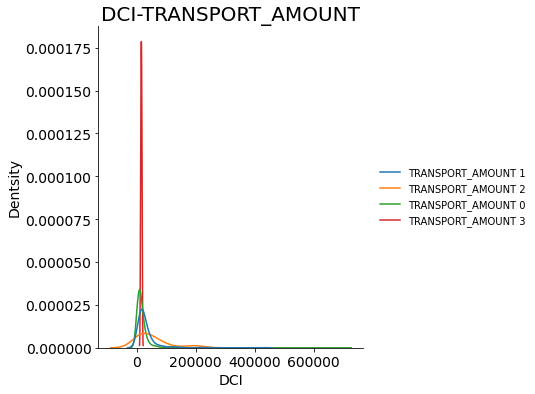

In [39]:
displot_by_value(df, 'DCI', 'TRANSPORT_AMOUNT')

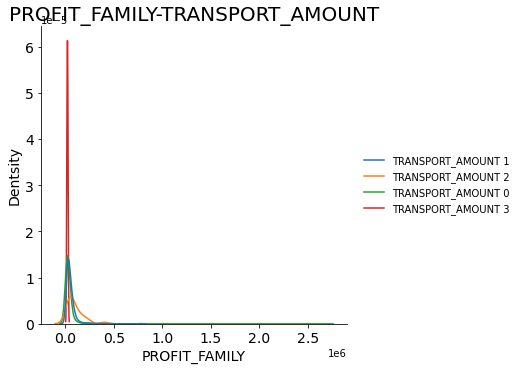

In [40]:
displot_by_value(df, 'PROFIT_FAMILY', 'TRANSPORT_AMOUNT')

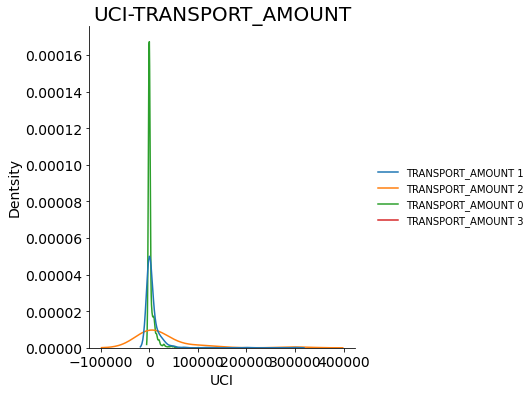

In [41]:
displot_by_value(df, 'UCI', 'TRANSPORT_AMOUNT')

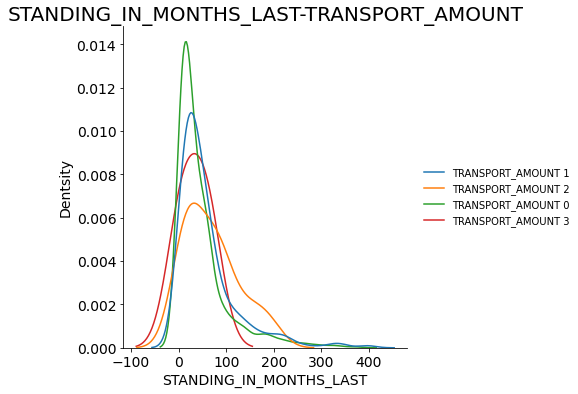

In [42]:
displot_by_value(df, 'STANDING_IN_MONTHS_LAST', 'TRANSPORT_AMOUNT')

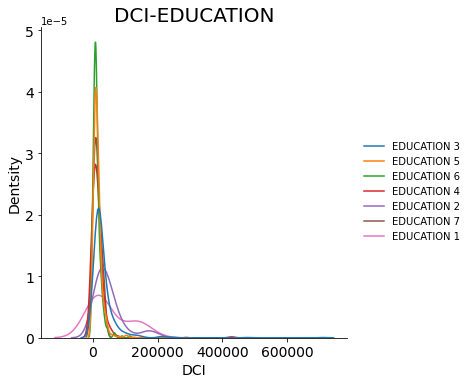

In [43]:
displot_by_value(df, 'DCI', 'EDUCATION')

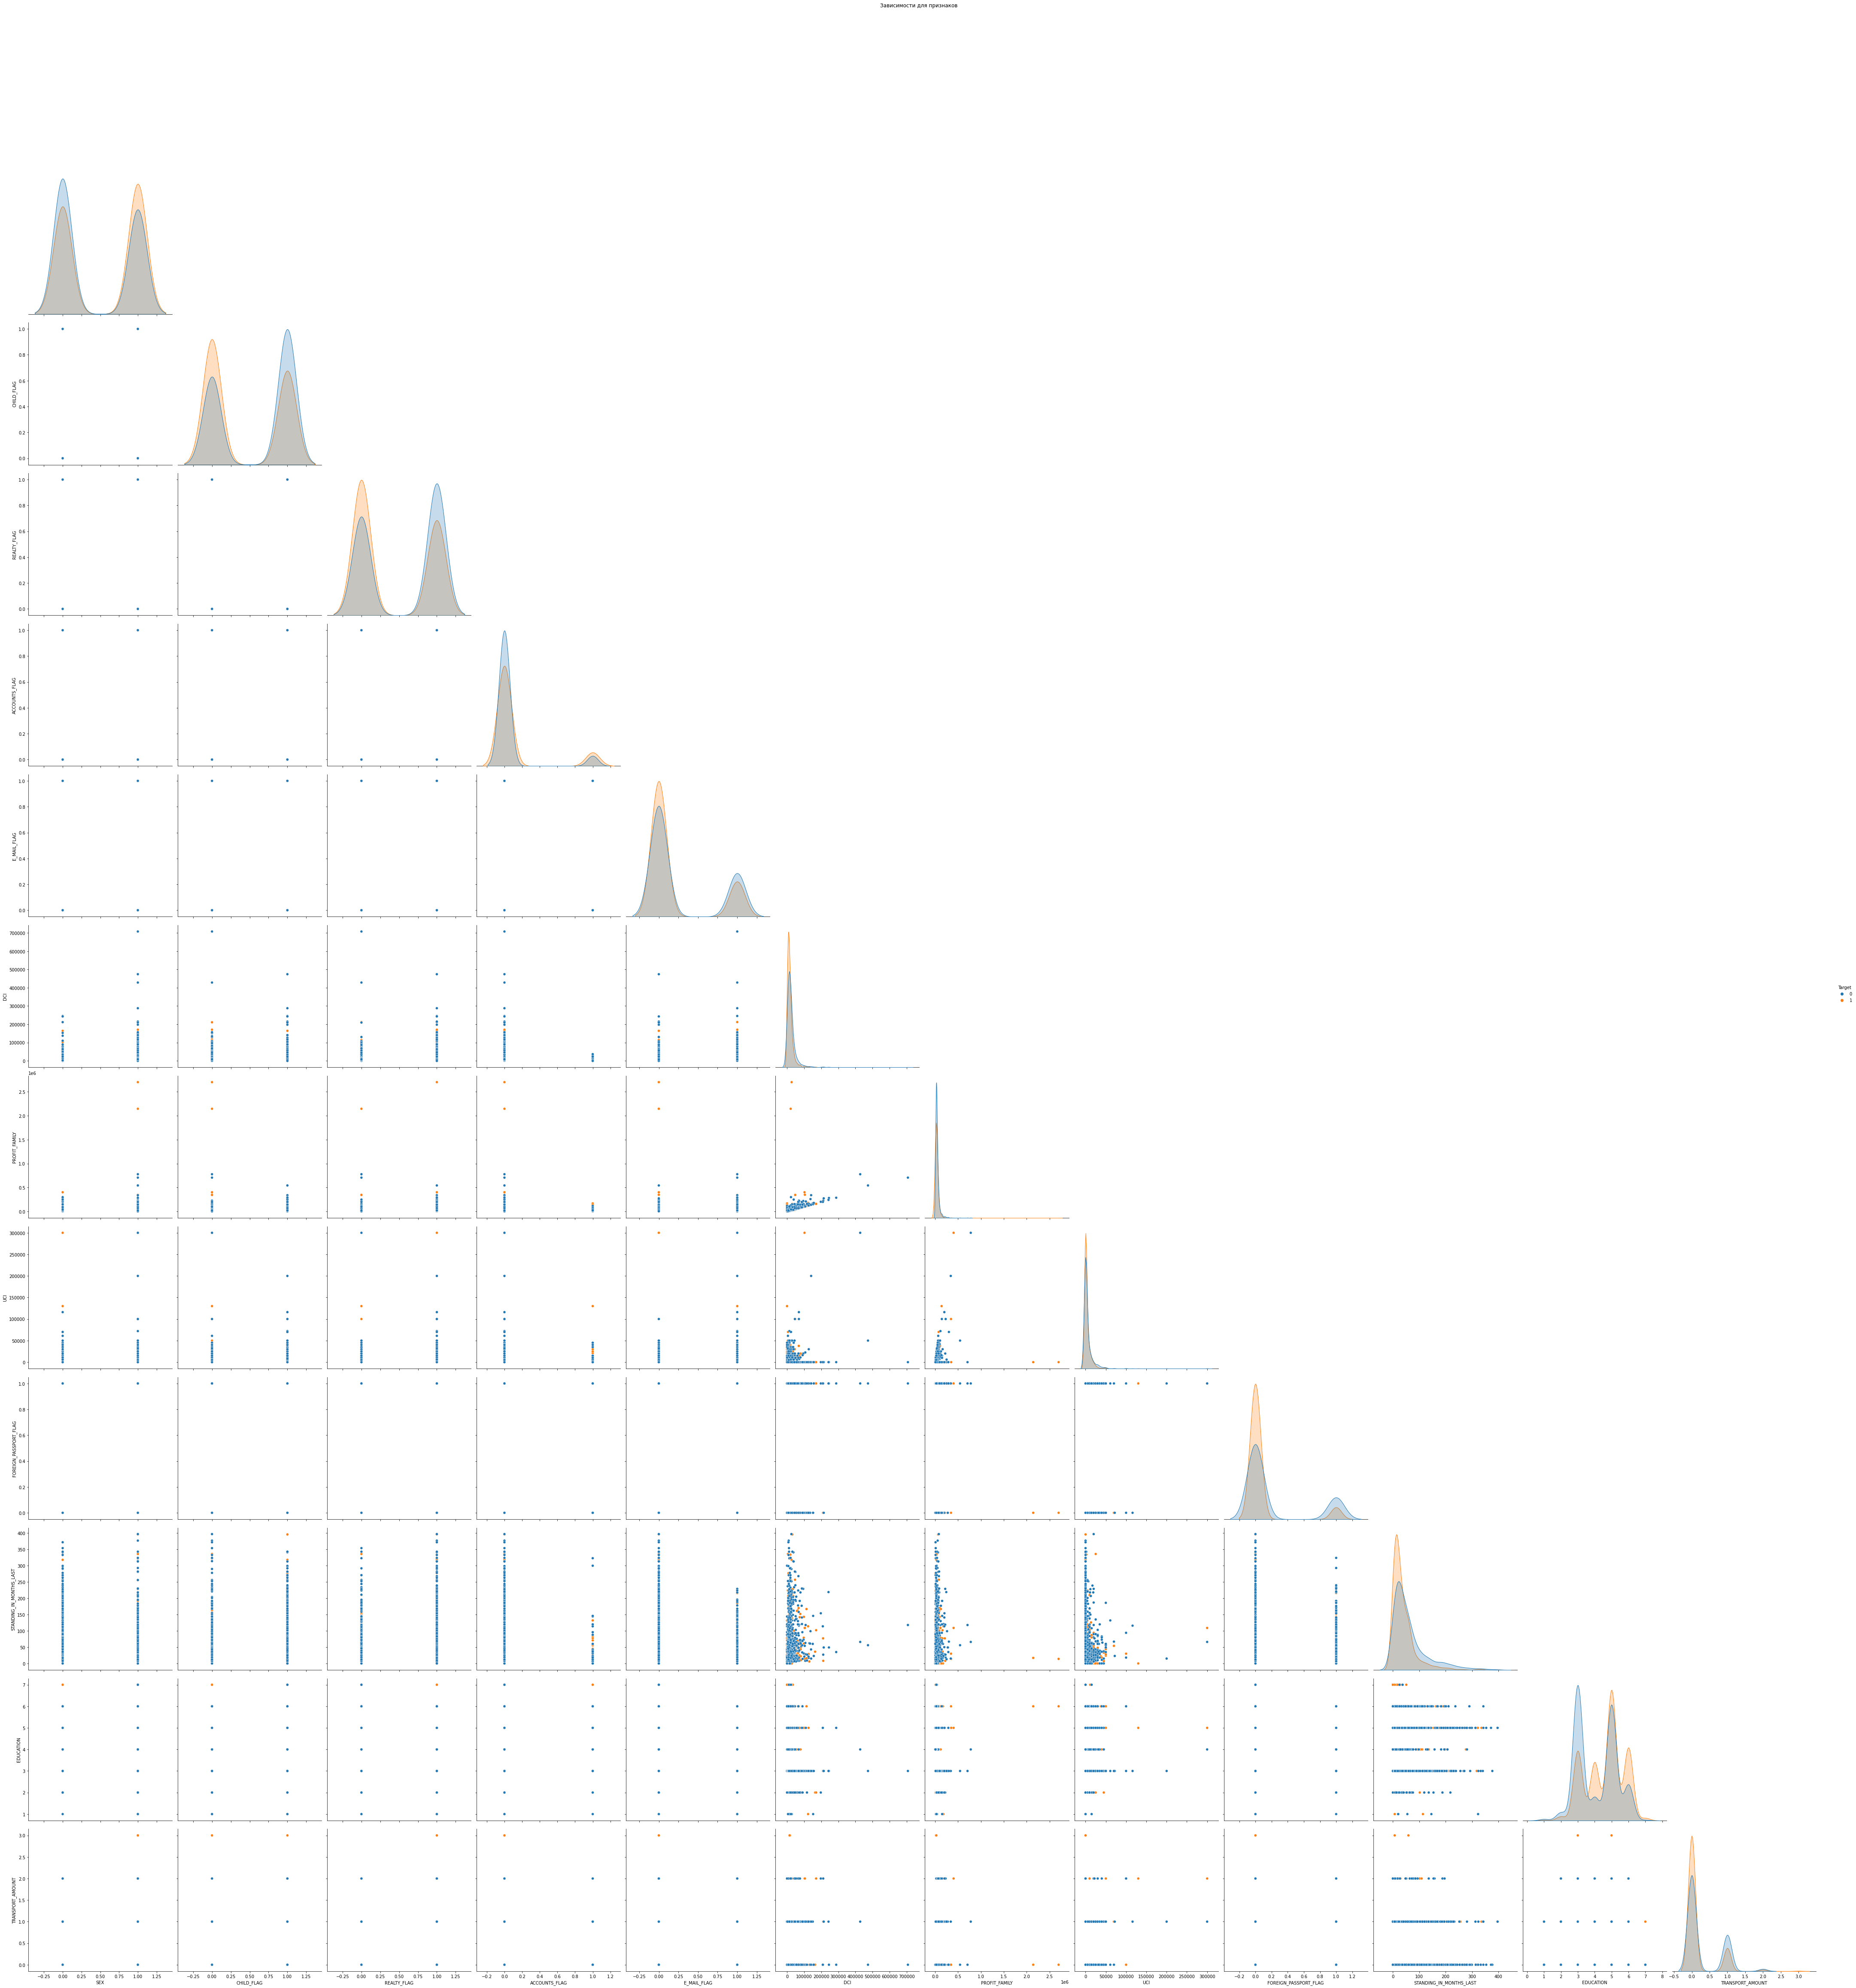

In [44]:
sns.pairplot( # матрица диаграмм рассеяния из Seaborn
data = df.drop(columns=['CLIENT_ID']), # данные
hue = 'Target', # имя столбца в данных для раскраски меток
corner = True, # матрица симметрична, не будем выводить лишние графики
height=5).fig.suptitle( # настройки заголовка
'Зависимости для признаков', # заголовок
y = 1.08 # расположение
);

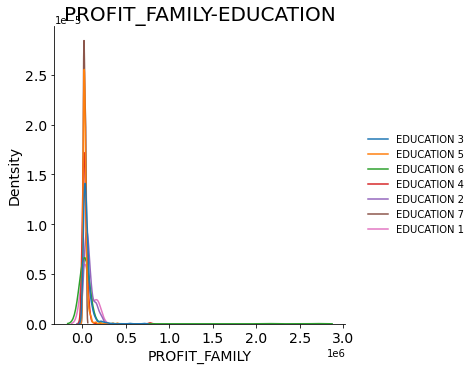

In [45]:
displot_by_value(df, 'PROFIT_FAMILY', 'EDUCATION')

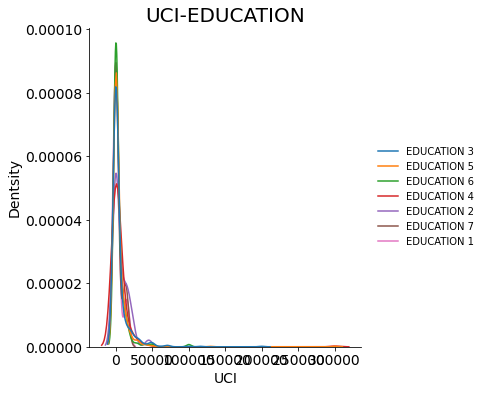

In [46]:
displot_by_value(df, 'UCI', 'EDUCATION')

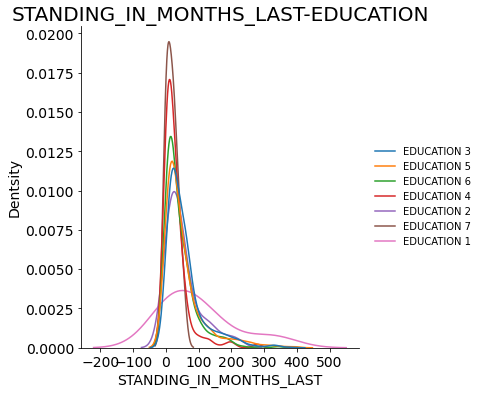

In [47]:
displot_by_value(df, 'STANDING_IN_MONTHS_LAST', 'EDUCATION')

### FE

In [48]:
df.dtypes

CLIENT_ID                    int64
SEX                          int64
CHILD_FLAG                   int64
REALTY_FLAG                  int64
ACCOUNTS_FLAG                int64
E_MAIL_FLAG                  int64
DCI                        float64
PROFIT_FAMILY              float64
UCI                        float64
FOREIGN_PASSPORT_FLAG        int64
STANDING_IN_MONTHS_LAST      int64
EDUCATION                    int64
TRANSPORT_AMOUNT             int64
Target                       int64
dtype: object

### Поиск выбросов

In [49]:
df_for_clust = preprocessing.normalize(df.iloc[:, 1: -1].values)
df_for_clust

array([[4.92064259e-05, 0.00000000e+00, 4.92064259e-05, ...,
        1.27936707e-03, 1.47619278e-04, 4.92064259e-05],
       [2.28732663e-05, 2.28732663e-05, 2.28732663e-05, ...,
        4.34592060e-04, 6.86197990e-05, 4.57465327e-05],
       [2.03603825e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.34378524e-03, 6.10811474e-05, 0.00000000e+00],
       ...,
       [1.08785555e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.30542666e-03, 4.35142220e-04, 0.00000000e+00],
       [3.30041916e-05, 0.00000000e+00, 0.00000000e+00, ...,
        3.96050299e-04, 1.98025150e-04, 0.00000000e+00],
       [1.13106502e-05, 1.13106502e-05, 1.13106502e-05, ...,
        4.63736660e-04, 2.26213005e-05, 1.13106502e-05]])

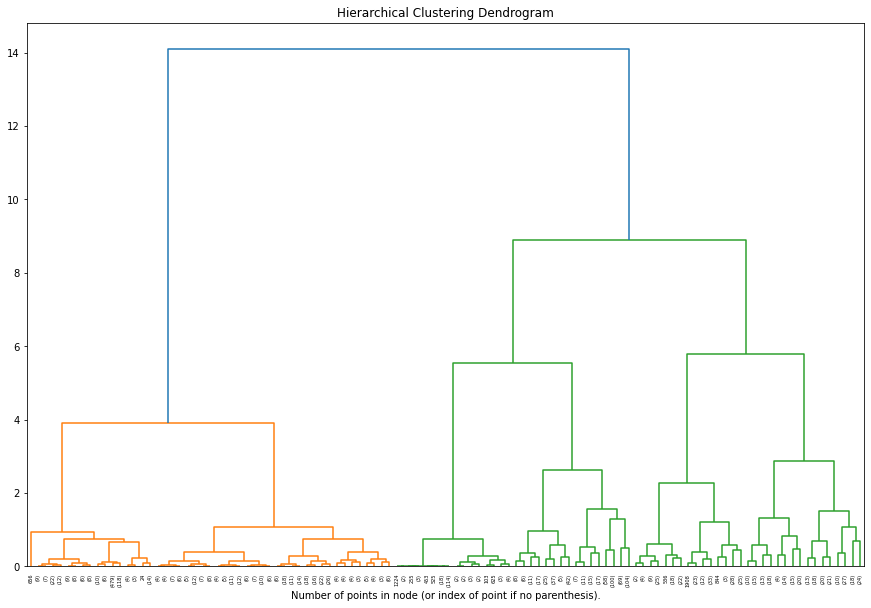

In [50]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_for_clust)
plt.title('Hierarchical Clustering Dendrogram')

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [51]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps=7)
clusters = outlier_detection.fit_predict(df_for_clust)
list(clusters).count(-1)

0

### Оцифровка номинальных данных 

In [52]:
df.drop(columns=['CLIENT_ID', 'Target']).nunique()

SEX                           2
CHILD_FLAG                    2
REALTY_FLAG                   2
ACCOUNTS_FLAG                 2
E_MAIL_FLAG                   2
DCI                        1817
PROFIT_FAMILY              1289
UCI                         123
FOREIGN_PASSPORT_FLAG         2
STANDING_IN_MONTHS_LAST     237
EDUCATION                     7
TRANSPORT_AMOUNT              4
dtype: int64

In [53]:
cat_list = []
num_list = []

for col in df.drop(columns=['CLIENT_ID', 'Target']):
    if df.drop(columns=['CLIENT_ID', 'Target'])[col].nunique() <= 7:
        cat_list.append(col)
    else:
        num_list.append(col)

for cat_feature in cat_list:
    df.loc[:, cat_feature] = df.loc[:, cat_feature].astype('object').values

for num_feature in num_list:
    df.loc[:, num_feature] = df.loc[:, num_feature].astype('float').values

In [54]:
cat_list

['SEX',
 'CHILD_FLAG',
 'REALTY_FLAG',
 'ACCOUNTS_FLAG',
 'E_MAIL_FLAG',
 'FOREIGN_PASSPORT_FLAG',
 'EDUCATION',
 'TRANSPORT_AMOUNT']

In [55]:
num_list

['DCI', 'PROFIT_FAMILY', 'UCI', 'STANDING_IN_MONTHS_LAST']

In [56]:
df.dtypes

CLIENT_ID                    int64
SEX                         object
CHILD_FLAG                  object
REALTY_FLAG                 object
ACCOUNTS_FLAG               object
E_MAIL_FLAG                 object
DCI                        float64
PROFIT_FAMILY              float64
UCI                        float64
FOREIGN_PASSPORT_FLAG       object
STANDING_IN_MONTHS_LAST    float64
EDUCATION                   object
TRANSPORT_AMOUNT            object
Target                       int64
dtype: object

In [109]:
df_g = pd.get_dummies(df, drop_first=True)
print("Количество столбцов: {}".format(df_g.shape[1]))
df_g.head()

Количество столбцов: 21


,CLIENT_ID,DCI,PROFIT_FAMILY,UCI,STANDING_IN_MONTHS_LAST,Target,SEX_1,CHILD_FLAG_1,REALTY_FLAG_1,ACCOUNTS_FLAG_1,E_MAIL_FLAG_1,FOREIGN_PASSPORT_FLAG_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,EDUCATION_7,TRANSPORT_AMOUNT_1,TRANSPORT_AMOUNT_2,TRANSPORT_AMOUNT_3
0,1,14370.2002,14370.2002,0.0,26.0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1,2,28312.8594,33312.8594,0.0,19.0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0
2,3,34729.5117,34729.5117,0.0,66.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,4,28738.4707,28738.4707,0.0,20.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,73310.0000,73310.0000,0.0,25.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [110]:
df_g.describe()

,CLIENT_ID,DCI,PROFIT_FAMILY,UCI,STANDING_IN_MONTHS_LAST,Target,SEX_1,CHILD_FLAG_1,REALTY_FLAG_1,ACCOUNTS_FLAG_1,E_MAIL_FLAG_1,FOREIGN_PASSPORT_FLAG_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,EDUCATION_7,TRANSPORT_AMOUNT_1,TRANSPORT_AMOUNT_2,TRANSPORT_AMOUNT_3
count,2153.000000,2153.000000,2.153000e+03,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000
mean,1082.673014,20614.373170,3.922861e+04,4286.722560,49.942406,0.498839,0.491407,0.517418,0.492336,0.094287,0.243846,0.153275,0.018579,0.314445,0.122155,0.373432,0.163493,0.004645,0.207153,0.013005,0.000929
std,623.746169,31277.846076,8.489338e+04,13995.496485,58.191865,0.500115,0.500042,0.499813,0.500057,0.292296,0.429501,0.360336,0.135063,0.464402,0.327541,0.483828,0.369901,0.068009,0.405360,0.113322,0.030471
min,1.000000,0.000000,5.600000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,543.000000,7770.490200,1.615856e+04,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1084.000000,13503.780300,2.685308e+04,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1622.000000,23226.240200,4.200000e+04,3400.000000,60.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2162.000000,707600.000000,2.699217e+06,300000.000000,397.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling и Разбиение на train val test

In [111]:
df_g.nunique()

CLIENT_ID                  2153
DCI                        1817
PROFIT_FAMILY              1289
UCI                         123
STANDING_IN_MONTHS_LAST     237
Target                        2
SEX_1                         2
CHILD_FLAG_1                  2
REALTY_FLAG_1                 2
ACCOUNTS_FLAG_1               2
E_MAIL_FLAG_1                 2
FOREIGN_PASSPORT_FLAG_1       2
EDUCATION_2                   2
EDUCATION_3                   2
EDUCATION_4                   2
EDUCATION_5                   2
EDUCATION_6                   2
EDUCATION_7                   2
TRANSPORT_AMOUNT_1            2
TRANSPORT_AMOUNT_2            2
TRANSPORT_AMOUNT_3            2
dtype: int64

In [112]:
df_g.dtypes

CLIENT_ID                    int64
DCI                        float64
PROFIT_FAMILY              float64
UCI                        float64
STANDING_IN_MONTHS_LAST    float64
Target                       int64
SEX_1                        uint8
CHILD_FLAG_1                 uint8
REALTY_FLAG_1                uint8
ACCOUNTS_FLAG_1              uint8
E_MAIL_FLAG_1                uint8
FOREIGN_PASSPORT_FLAG_1      uint8
EDUCATION_2                  uint8
EDUCATION_3                  uint8
EDUCATION_4                  uint8
EDUCATION_5                  uint8
EDUCATION_6                  uint8
EDUCATION_7                  uint8
TRANSPORT_AMOUNT_1           uint8
TRANSPORT_AMOUNT_2           uint8
TRANSPORT_AMOUNT_3           uint8
dtype: object

In [186]:
df_g_shuffled = df_g.drop(columns=['CLIENT_ID']).sample(frac=1, random_state=48).reset_index(drop=True)

In [187]:
df_g_shuffled.shape, df_g_shuffled.shape[0] * 0.6, df_g_shuffled.shape[0] * 0.4

((2153, 20), 1291.8, 861.2)

In [188]:
train_len, val_len, test_len = 1291, 431, 431
sum([train_len, val_len, test_len])

2153

In [189]:
df_g_shuffled.columns

Index(['DCI', 'PROFIT_FAMILY', 'UCI', 'STANDING_IN_MONTHS_LAST', 'Target',
       'SEX_1', 'CHILD_FLAG_1', 'REALTY_FLAG_1', 'ACCOUNTS_FLAG_1',
       'E_MAIL_FLAG_1', 'FOREIGN_PASSPORT_FLAG_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'EDUCATION_7', 'TRANSPORT_AMOUNT_1', 'TRANSPORT_AMOUNT_2',
       'TRANSPORT_AMOUNT_3'],
      dtype='object')

In [228]:
X_train_val_unscaled.shape

(1722, 4)

In [227]:
X_train = df_g_shuffled.loc[:train_len - 1, num_list].values
X_train_val_unscaled = np.copy(X_train)
y_train = df_g_shuffled.loc[:train_len - 1, 'Target'].values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.concatenate((X_train, df_g_shuffled.iloc[:train_len, 5:].values), axis=1)

X_val = df_g_shuffled.loc[train_len: train_len + val_len - 1, num_list].values
X_train_val_unscaled = np.concatenate((X_train_val_unscaled, np.copy(X_val)))
y_val = df_g_shuffled.loc[train_len: train_len + val_len - 1, 'Target'].values
X_val = scaler.transform(X_val)
X_val = np.concatenate((X_val, df_g_shuffled.iloc[train_len: train_len + val_len, 5:].values), axis=1)

X_train_val = df_g_shuffled.loc[:train_len + val_len - 1, num_list].values
y_train_val = df_g_shuffled.loc[:train_len + val_len - 1, 'Target'].values
scaler = StandardScaler()
scaler.fit(X_train_val)
X_train_val = scaler.transform(X_train_val)
X_train_val = np.concatenate((X_train_val, df_g_shuffled.iloc[: train_len + val_len, 5:].values), axis=1)

X_test = df_g_shuffled.loc[train_len + val_len:, num_list].values
y_test = df_g_shuffled.loc[train_len + val_len:, 'Target'].values
X_test = scaler.transform(X_test)
X_test = np.concatenate((X_test, df_g_shuffled.iloc[train_len + val_len:, 5:].values), axis=1)

In [191]:
X_train.shape, X_val.shape, X_train_val.shape, X_test.shape

((1291, 19), (431, 19), (1722, 19), (431, 19))

In [192]:
y_train.mean(), y_test.mean(), y_val.mean(), 

(0.49264136328427577, 0.5034802784222738, 0.5127610208816705)

### Корреляция признаков

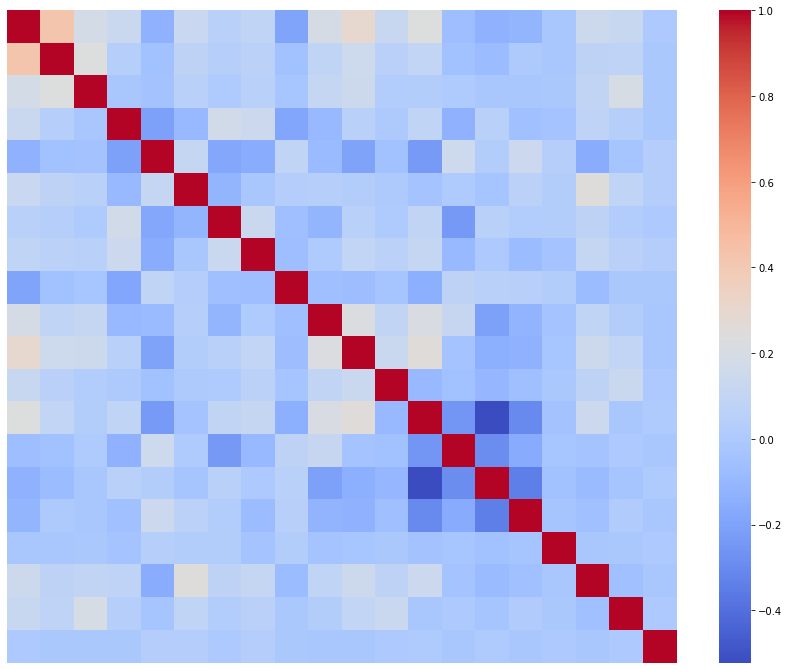

In [193]:
cor = df_g.drop(columns=['CLIENT_ID']).corr()

plt.figure(figsize=(15, 12))
sns.heatmap(cor, xticklabels=False, yticklabels=False, cmap= 'coolwarm')

In [194]:
cor.style.background_gradient(cmap='coolwarm').highlight_min()

,DCI,PROFIT_FAMILY,UCI,STANDING_IN_MONTHS_LAST,Target,SEX_1,CHILD_FLAG_1,REALTY_FLAG_1,ACCOUNTS_FLAG_1,E_MAIL_FLAG_1,FOREIGN_PASSPORT_FLAG_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,EDUCATION_7,TRANSPORT_AMOUNT_1,TRANSPORT_AMOUNT_2,TRANSPORT_AMOUNT_3
DCI,1.000000,0.425687,0.180063,0.131846,-0.126138,0.127120,0.050016,0.084568,-0.194394,0.193972,0.294704,0.122946,0.233377,-0.068504,-0.128745,-0.114627,-0.015687,0.148507,0.121495,-0.004407
PROFIT_FAMILY,0.425687,1.000000,0.236677,0.036654,-0.049426,0.075065,0.036978,0.060238,-0.050920,0.087235,0.152233,0.057448,0.100363,-0.050767,-0.079909,0.001947,-0.012208,0.076190,0.080051,-0.006477
UCI,0.180063,0.236677,1.000000,-0.014094,-0.045435,0.050423,0.008880,0.049203,-0.028110,0.107858,0.143726,0.019486,0.028455,0.007110,-0.022094,-0.017420,-0.007991,0.089986,0.202741,-0.009342
STANDING_IN_MONTHS_LAST,0.131846,0.036654,-0.014094,1.000000,-0.209411,-0.093214,0.170426,0.142507,-0.186519,-0.091228,0.050017,0.002087,0.088812,-0.134670,0.049420,-0.058022,-0.037506,0.079008,0.037108,-0.008880
Target,-0.126138,-0.049426,-0.045435,-0.209411,1.000000,0.111914,-0.177919,-0.159367,0.084988,-0.088460,-0.200141,-0.047836,-0.233516,0.152633,0.024838,0.139181,0.041145,-0.154681,-0.032530,0.030564
SEX_1,0.127120,0.075065,0.050423,-0.093214,0.111914,1.000000,-0.117930,-0.022099,0.032570,0.036806,0.027944,0.002365,-0.035384,0.010667,-0.030907,0.062869,0.028502,0.249498,0.083977,0.031021
CHILD_FLAG_1,0.050016,0.036978,0.008880,0.170426,-0.177919,-0.117930,1.000000,0.136722,-0.063729,-0.113956,0.049673,0.008971,0.091506,-0.241500,0.051876,0.022292,0.024960,0.073925,0.020611,-0.001063
REALTY_FLAG_1,0.084568,0.060238,0.049203,0.142507,-0.159367,-0.022099,0.136722,1.000000,-0.069765,0.009787,0.096783,0.064031,0.113432,-0.089324,0.000310,-0.081150,-0.039944,0.110995,0.059161,0.030964
ACCOUNTS_FLAG_1,-0.194394,-0.050920,-0.028110,-0.186519,0.084988,0.032570,-0.063729,-0.069765,1.000000,-0.064778,-0.075509,-0.032622,-0.136357,0.073788,0.049922,0.046464,0.024711,-0.082564,-0.008979,-0.009838
E_MAIL_FLAG_1,0.193972,0.087235,0.107858,-0.091228,-0.088460,0.036806,-0.113956,0.009787,-0.064778,1.000000,0.223781,0.090087,0.209478,0.115176,-0.212552,-0.122359,-0.038792,0.086062,0.030287,-0.017316


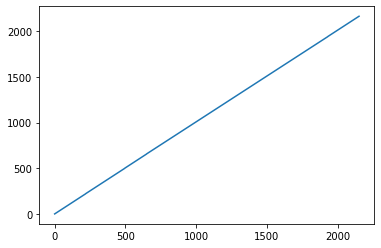

In [195]:
plt.plot(range(0, 2153), df_g.CLIENT_ID.values)

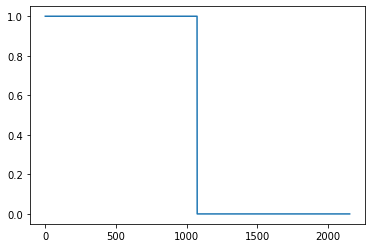

In [196]:
plt.plot(range(0, 2153), df_g.Target.values)

In [197]:
all_features = list(cor.columns)
f_to_del = []

for i in cor.columns:
    if i =='Target':
        continue
    for j in cor.index:
        if all_features.index(j) >= all_features.index(i) or j =='Target' :
            continue
        else:
            if abs(cor.loc[i, j]) > 0.6: 
                if abs(cor.loc['Target', i]) > abs(cor.loc['Target', j]):
                    f_to_del.append(j)
                else:
                    f_to_del.append(i)

In [198]:
f_to_del = set(f_to_del)
f_to_del

set()

In [199]:
# correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

# plot = sns.barplot(y=correlations.index, x=correlations)
# plot.figure.set_size_inches(15, 10)

## Посмотрим на все модели

In [200]:
def get_all_statistics():
    pass

def results(y_test, y_pred, time = 0):
    report = metrics.classification_report(y_test, y_pred, target_names=['recovered', 'uncovered'])
    print(report)
    
    print('\nПлощадь под ROC-кривой - ' + str(round(metrics.roc_auc_score(y_test, y_pred), 8)))
    if time != 0:
        print('\nВремя работы кода - ' + str(round(time, 4)) + ' сек')
        
def ROC_curve(X_, y_, model):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(6, 5))
    fpr, tpr, thresholds = metrics.roc_curve(y_, model.predict_proba(X_)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

           
def ROC_curve_all(y_test, y_pred):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(6, 5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

In [201]:
roc_auc_scorer = make_scorer(metrics.roc_auc_score, greater_is_better=True,
                             needs_threshold=True)

In [202]:
import lightgbm as lgb
clf = LogisticRegression(random_state=0, C = 1, penalty = 'l2', solver = "liblinear")
clf.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators = 500, max_features=10, max_depth=None, random_state=11, criterion='entropy')
rf.fit(X_train, y_train)

XGB = XGBClassifier(refresh_leaf =0, verbosity=0, max_depth = 3, n_estimators=80,
                    reg_alpha=0, reg_lambda=10, sampling_method = 'gradient_based')
xgb_model = XGB.fit(X_train, y_train, eval_metric="auc", verbose=False,
                    eval_set=[(X_val, y_val)], early_stopping_rounds=20)

GB = GBoost(loss = 'exponential', max_depth=3, n_estimators=100, )
GB.fit(X_train, y_train)

lgb = lgb.LGBMClassifier(refresh_leaf =0, verbosity=0, max_depth = 3, n_estimators=150,
                         reg_alpha=0, reg_lambda=10, sampling_method = 'gradient_based' )
lgb.fit(X_train, y_train)

nn = MLPClassifier(activation='logistic',solver = 'adam',
                      hidden_layer_sizes=(100, 100))
nn.fit(X_train, y_train)

lda = LDA()
lda.fit(X_train, y_train)

svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, y_train)

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

[0]	validation_0-auc:0.636544
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.653878
[2]	validation_0-auc:0.648352
[3]	validation_0-auc:0.655753
[4]	validation_0-auc:0.657111
[5]	validation_0-auc:0.655344
[6]	validation_0-auc:0.653911
[7]	validation_0-auc:0.659545
[8]	validation_0-auc:0.668013
[9]	validation_0-auc:0.67229
[10]	validation_0-auc:0.672592
[11]	validation_0-auc:0.672387
[12]	validation_0-auc:0.674208
[13]	validation_0-auc:0.678
[14]	validation_0-auc:0.680726
[15]	validation_0-auc:0.679767
[16]	validation_0-auc:0.681114
[17]	validation_0-auc:0.683193
[18]	validation_0-auc:0.685542
[19]	validation_0-auc:0.686727
[20]	validation_0-auc:0.687438
[21]	validation_0-auc:0.688505
[22]	validation_0-auc:0.689323
[23]	validation_0-auc:0.689808
[24]	validation_0-auc:0.690131
[25]	validation_0-auc:0.690131
[26]	validation_0-auc:0.690433
[27]	validation_0-auc:0.690929
[28]	validation_0-auc:0.691457
[29]	validation_0-auc:0.692286
[30]	validation_0-au

KNeighborsClassifier(n_neighbors=7)

In [203]:
import seaborn as sns
models = [clf, rf, XGB, GB, lgb, nn, lda, svm, Bayes, neigh]
test_list = []
to_pred_list = []

for model in models:
  test_list.append(metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
  to_pred_list.append(metrics.roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

names =  ['log_reg', 'rf', 'XGB', 'GB', 'LGBM', 'NN', 'LDA', 'SVM', 'Bayes', 'KNN']
names2 = [i+", " + i for i in names]
print(names2)
names2 = ', '.join(names2)
print(names2)
names2 = names2.split(', ')
print(names2)


print()
data = [[test_list[i], to_pred_list[i]] for i in range(10)]
print(data)
data = np.array(data).flatten()
print(data)

['log_reg, log_reg', 'rf, rf', 'XGB, XGB', 'GB, GB', 'LGBM, LGBM', 'NN, NN', 'LDA, LDA', 'SVM, SVM', 'Bayes, Bayes', 'KNN, KNN']
log_reg, log_reg, rf, rf, XGB, XGB, GB, GB, LGBM, LGBM, NN, NN, LDA, LDA, SVM, SVM, Bayes, Bayes, KNN, KNN
['log_reg', 'log_reg', 'rf', 'rf', 'XGB', 'XGB', 'GB', 'GB', 'LGBM', 'LGBM', 'NN', 'NN', 'LDA', 'LDA', 'SVM', 'SVM', 'Bayes', 'Bayes', 'KNN', 'KNN']

[[0.7468877526525517, 0.7208575737987504], [0.9999987997503481, 0.6556776556776558], [0.8028721974170627, 0.700280112044818], [0.8567898122809543, 0.6938052143934497], [0.8312581016851506, 0.6929864253393665], [0.7480687983100486, 0.7221934927817282], [0.747312641029334, 0.718767507002801], [0.7535899467089153, 0.6977806507218272], [0.7219849728743579, 0.697737556561086], [0.8189291372605503, 0.6452380952380952]]
[0.74688775 0.72085757 0.9999988  0.65567766 0.8028722  0.70028011
 0.85678981 0.69380521 0.8312581  0.69298643 0.7480688  0.72219349
 0.74731264 0.71876751 0.75358995 0.69778065 0.72198497 0.69773

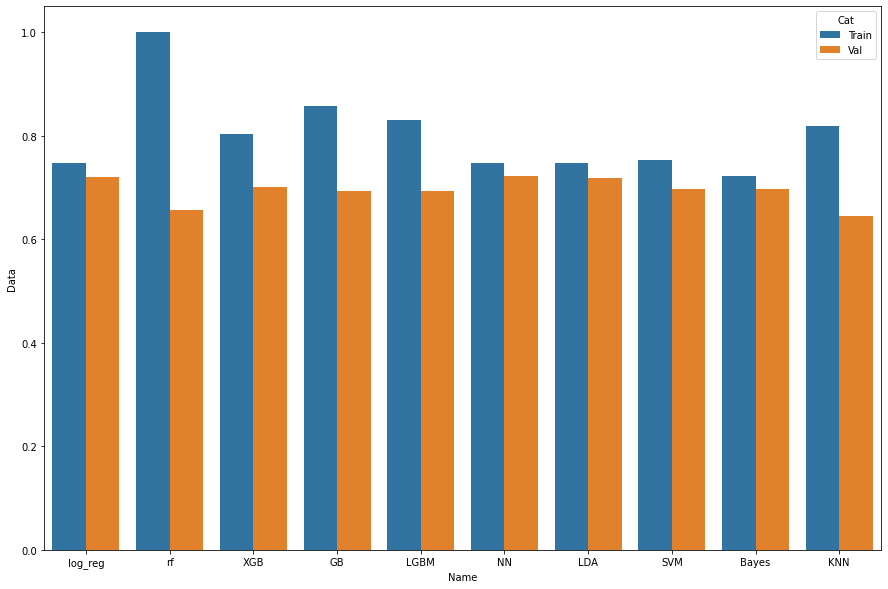

In [204]:
plt.figure(figsize=(15, 10))
data1 = {'Name': names2,
        'Data': data,
        'Cat': ['Train', 'Val'] * 10}
df1 = pd.DataFrame(data1)
sns.barplot(x = 'Name', y = 'Data', data=df1, hue="Cat")

In [205]:
df1.query('`Cat` == "Val"').sort_values(by='Data', ascending=False)

,Name,Data,Cat
11,NN,0.722193,Val
1,log_reg,0.720858,Val
13,LDA,0.718768,Val
5,XGB,0.700280,Val
15,SVM,0.697781,Val
17,Bayes,0.697738,Val
7,GB,0.693805,Val
9,LGBM,0.692986,Val
3,rf,0.655678,Val
19,KNN,0.645238,Val


## Модели по отдельности

### Сравнение XBOOST LGBM CATBOOST

In [206]:
%%capture
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install optuna

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances

In [207]:
# XGBClassifier
xgbc_model = XGBClassifier(min_child_weight=0.1, reg_lambda=100, booster='gbtree', objective='binary:logitraw', random_state=42)
xgbc_score = cross_val_score(xgbc_model, X_train_val, y_train_val, scoring='roc_auc', cv=5)
print('xgbc_score: ', xgbc_score.mean())

# LGBMClassifier
ligthgbmc_model = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)
ligthgbmc_score = cross_val_score(ligthgbmc_model, X_train_val, y_train_val, scoring='roc_auc', cv=5)
print('ligthgbmc_score: ', ligthgbmc_score.mean())

# CatBoostClassifier
cbc_model = CatBoostClassifier(loss_function='Logloss', random_state=42, verbose=False)
cbc_score = cross_val_score(cbc_model, X_train_val, y_train_val, scoring='roc_auc', cv=5)
print('cbc_score: ', cbc_score.mean())

xgbc_score:  0.7212352081530169
ligthgbmc_score:  0.6658506731946146
cbc_score:  0.7029195743312666


### Xgboost + Optuna

In [223]:
def objective(trial, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    # X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=42)

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 19),
        'learning_rate': trial.suggest_categorical('learning_rate', list(np.arange(0, 1, 0.001))),
        'n_estimators': trial.suggest_int('n_estimators', 200, 3000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0, step=0.001),
        'alpha': trial.suggest_float('alpha', 0.0, 10.0, step=0.001),
        'lambda': trial.suggest_float('lambda', 0.0, 10.0, step=0.001),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0, step=0.001),
        'subsample': trial.suggest_float('subsample', 0.0, 1.0, step=0.001),
        'tree_method': 'gpu_hist',
        'booster': 'gbtree',
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'auc'
    }
    
    model = XGBClassifier(**params)  
    model.fit(X_train, y_train, eval_set = [(X_val,y_val)], early_stopping_rounds = 130, verbose = False)
    y_pred = model.predict_proba(X_val)[:,1]
    roc_auc = roc_auc_score(y_val, y_pred)

    return roc_auc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print('Best value: ', study.best_value)

Best value:  0.7345184227537169


In [211]:
study.best_params

{'max_depth': 6,
 'learning_rate': 0.343,
 'n_estimators': 1126,
 'min_child_weight': 30,
 'gamma': 0.558,
 'alpha': 8.392,
 'lambda': 3.015,
 'colsample_bytree': 0.114,
 'subsample': 0.744}

In [210]:
study.best_params

{'max_depth': 6,
 'learning_rate': 0.343,
 'n_estimators': 1126,
 'min_child_weight': 30,
 'gamma': 0.558,
 'alpha': 8.392,
 'lambda': 3.015,
 'colsample_bytree': 0.114,
 'subsample': 0.744}

In [212]:
plot_optimization_history(study)

In [213]:
optuna.visualization.plot_param_importances(study)

In [237]:
params={'max_depth': 6,
 'learning_rate': 0.343,
 'n_estimators': 1126,
 'min_child_weight': 30,
 'gamma': 0.558,
 'alpha': 8.392,
 'lambda': 3.015,
 'colsample_bytree': 0.114,
 'subsample': 0.744}

model = XGBClassifier(**params)  
model.fit(X_train, y_train, eval_set = [(X_val,y_val)], early_stopping_rounds = 100, verbose = False)
y_pred = model.predict_proba(X_val)[:,1]
roc_auc = roc_auc_score(y_val, y_pred)

In [238]:
y_pred = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.7138873336491667

### Логистическая регрессия

              precision    recall  f1-score   support

   recovered       0.65      0.63      0.64       210
   uncovered       0.66      0.67      0.66       221

    accuracy                           0.65       431
   macro avg       0.65      0.65      0.65       431
weighted avg       0.65      0.65      0.65       431


Площадь под ROC-кривой - 0.6515083

Время работы кода - 0.0068 сек


Результат на валидационной выборке с учетом вероятностей: 0.7208575737987504


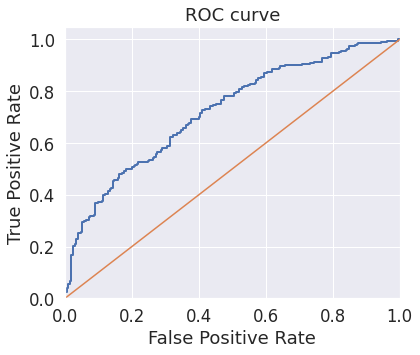

In [219]:
from pandas.core.common import random_state
start_time = process_time()

clf = LogisticRegression(random_state=237, C = 1, penalty = 'l2', 
                         solver = "liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

finish_time = process_time()
sec = finish_time - start_time

results(y_val, y_pred, sec)

print("\n")
print("Результат на валидационной выборке с учетом вероятностей: " + str(metrics.roc_auc_score(
    y_val, clf.predict_proba(X_val)[:,1])))

ROC_curve(X_val, y_val, clf)

In [220]:
feature_idx_list = []
for col, weight in zip(df_g.drop(columns=['CLIENT_ID', 'Target']).columns, clf.coef_[0]):
    feature_idx_list.append((weight, col))

feature_idx_list.sort(key = lambda x: abs(x[0]))
feature_idx_list

[(0.010420602403683473, 'UCI'),
 (0.031163546587738955, 'PROFIT_FAMILY'),
 (-0.0998768755885365, 'DCI'),
 (0.13377736876357366, 'EDUCATION_5'),
 (-0.1736230676616331, 'EDUCATION_2'),
 (0.23851195601517342, 'TRANSPORT_AMOUNT_3'),
 (-0.2398563530272276, 'ACCOUNTS_FLAG_1'),
 (-0.2546473754161818, 'E_MAIL_FLAG_1'),
 (-0.29765254671868613, 'CHILD_FLAG_1'),
 (-0.3567144811180103, 'REALTY_FLAG_1'),
 (-0.3856414087617457, 'STANDING_IN_MONTHS_LAST'),
 (0.4203411654510862, 'EDUCATION_6'),
 (-0.42449502051237464, 'TRANSPORT_AMOUNT_2'),
 (0.5468677029186663, 'SEX_1'),
 (-0.5583304355699555, 'EDUCATION_3'),
 (0.5933962638596318, 'EDUCATION_7'),
 (-0.6303374214630703, 'TRANSPORT_AMOUNT_1'),
 (-0.7072455243546567, 'FOREIGN_PASSPORT_FLAG_1'),
 (0.7609858745255901, 'EDUCATION_4')]

In [225]:
np.logspace(-2, 2, 5) 

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [231]:
np.logspace(-2, 2, 3)

array([1.e-02, 1.e+00, 1.e+02])

In [233]:
%%time
parameters = {
    'C': np.logspace(-1, 1, 3),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'tol': [1e-4],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [10e4],
    }

gr_lr = GridSearchCV(LogisticRegression(n_jobs=-1, random_state=17), parameters,
                     cv=5, scoring = "roc_auc")
gr_lr.fit(X_train_val, y_train_val)
gr_lr.best_params_

# pipe = Pipeline(
#     [('scaler', StandardScaler()), 
#      ('clf', LogisticRegression(n_jobs=-1, random_state=177))
#      ])

# C_OPTIONS = np.logspace(-2, 2, 5)  # np.logspace(-2, 2, 10) 
# PENALTY_OPTIONS = ['l1', 'l2', 'elasticnet', 'none']
# TOL = [1e-5, 1e-4, 1e-3]
# SOLVER = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# MAX_ITER = [10e4]

# param_grid = [
#     {
#         # "dim_reduction__n_components": N_FEATURES_OPTIONS,
#         "clf__C": C_OPTIONS,
#         "clf__penalty": PENALTY_OPTIONS, 
#         "clf__tol": TOL,
#         "clf__solver": SOLVER,
#         "clf__max_iter": MAX_ITER
#     },
# ]

# # scoring = ['accuracy', 'f1_weighted']
# gr_lr = GridSearchCV(pipe, param_grid=param_grid, scoring="roc_auc",
#                      refit='accuracy', cv=5, return_train_score=True)
# gr_lr.fit(X_train_val_unscaled, y_train_val)
# gr_lr.best_params_

CPU times: user 1.25 s, sys: 157 ms, total: 1.41 s
Wall time: 1min 5s


{'C': 0.1,
 'max_iter': 100000.0,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.0001}

In [ ]:
# categorical_features = ['brand', 'category_name', 'sub_category']
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
# numeric_features = ['num1', 'num2', 'num3', 'num4']
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])


# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('regressor', LogisticRegression(n_jobs=-1, random_state=17))])

              precision    recall  f1-score   support

   recovered       0.69      0.66      0.68       865
   uncovered       0.67      0.70      0.69       857

    accuracy                           0.68      1722
   macro avg       0.68      0.68      0.68      1722
weighted avg       0.68      0.68      0.68      1722


Площадь под ROC-кривой - 0.68302251

Время работы кода - 0.0093 сек


Результат на оценочной (скрытой) выборке 0.722619406520522


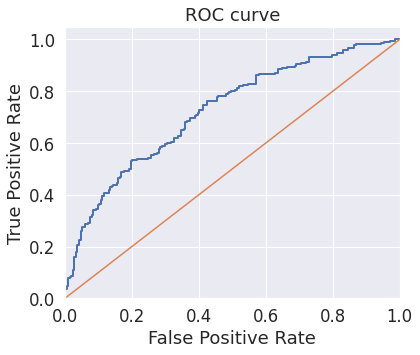

In [234]:
start_time = process_time()

clf = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=100000.0, tol=0.0001)

clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_train_val)

finish_time = process_time()
sec = finish_time - start_time

results(y_train_val, y_pred, sec)

print("\n")
print("Результат на оценочной (скрытой) выборке " + str(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))

ROC_curve(X_test, y_test, clf)

### Случайный лес

              precision    recall  f1-score   support

   recovered       0.60      0.64      0.62       210
   uncovered       0.63      0.59      0.61       221

    accuracy                           0.61       431
   macro avg       0.62      0.62      0.61       431
weighted avg       0.62      0.61      0.61       431


Площадь под ROC-кривой - 0.61542771

Время работы кода - 0.9199 сек


Площадь под ROC-кривой по вероятностям 0.6623787976729154


Результат на оценочной выборке  0.6649726517076533


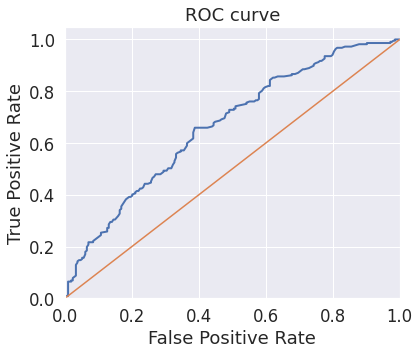

In [241]:
t1 = time()

rf = RandomForestClassifier(n_estimators= 250, max_depth=None, random_state=777, criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

t2 = time()
sec = t2 - t1

results(y_val, y_pred, sec)
print("\n")
print("Площадь под ROC-кривой по вероятностям " + str(metrics.roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])))

print("\n")
print("Результат на оценочной выборке  " + str(metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

ROC_curve(X_test, y_test, rf)

In [245]:
t1 = time()

# 16

# n_estimatorsint, default=100
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
# max_depthint, default=None
# min_samples_splitint or float, default=2

# grid = { 
#     'n_estimators': [200,300,400,500],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy'],
#     'random_state' : [18]
# }

# 
parameters = {
    'n_estimators': [1000],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
    'criterion': ['entropy', 'gini'],
    'max_features': ['sqrt'],
    'random_state' : [777],
    }

gr_rf = GridSearchCV(ensemble.RandomForestClassifier(), parameters, cv=5, n_jobs=-1, scoring = roc_auc_scorer)
gr_rf.fit(X_train_val, y_train_val)

t2 = time()
sec = t2 - t1
sec

116.95128917694092

In [246]:
gr_rf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 1000,
 'random_state': 777}

              precision    recall  f1-score   support

   recovered       0.74      0.72      0.73       865
   uncovered       0.73      0.75      0.74       857

    accuracy                           0.74      1722
   macro avg       0.74      0.74      0.74      1722
weighted avg       0.74      0.74      0.74      1722


Площадь под ROC-кривой - 0.73525067

Время работы кода - 1.9921 сек


Результат на оценочной (скрытой) выборке 0.7035079030104655


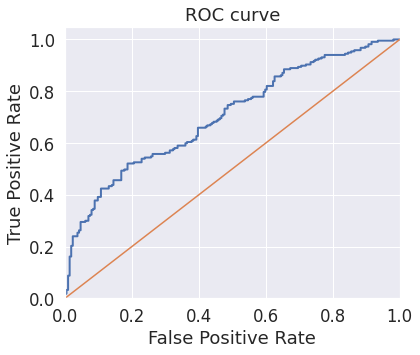

In [247]:
t1 = time()

clf = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt',
                             n_estimators=1000, random_state=18)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_train_val)

t2 = time()
sec = t2 - t1

results(y_train_val, y_pred, sec)

print("\n")
print("Результат на оценочной (скрытой) выборке " + str(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))

ROC_curve(X_test, y_test, clf)
#0.749 0.738

# Задача 4.
## Написать код SQL – запроса к таблице данных из задачи 3 (каждая задача решается одним запросом):

## 1) Количество уникальных/неуникальных Client_id.

**Не очень понял вопрос, поэтому сделаю оба варианта**

In [ ]:
# если нужно просто количество уникальных и количество всех
query1 = """
select COUNT(DISTINCT(CLIENT_ID)) as unique_num, COUNT(CLIENT_ID) as ununique_num
FROM df
"""
ps.sqldf(query1, locals())

,unique_num,ununique_num
0,2162,2163


In [ ]:
df.CLIENT_ID.nunique(), df.CLIENT_ID.size

(2162, 2163)

In [ ]:
# если нужно количество уникальных (встречающихся 1 раз) и количество неуникальных (встречающихся > 1 раза)
query1 = """
select COUNT(DISTINCT(CLIENT_ID)) as unique_num, COUNT(CLIENT_ID) - COUNT(DISTINCT(CLIENT_ID)) as ununique_num
FROM df
"""
ps.sqldf(query1, locals())

,unique_num,ununique_num
0,2162,1


In [ ]:
df.CLIENT_ID.nunique(), df.CLIENT_ID.size - df.CLIENT_ID.nunique()

(2162, 1)

## 2) Посчитать долю значений целевого признака (target=1) в разрезе категорий образования.

In [ ]:
query2 = """
select AVG(Target) as target_unit_ratio
FROM df
GROUP BY EDUCATION
"""
ps.sqldf(query2, locals())

,target_unit_ratio
0,0.285714
1,0.325000
2,0.327434
3,0.704545
4,0.516646
5,0.657224
6,0.800000


In [ ]:
df.groupby('EDUCATION').agg({'Target': ['mean']})

,Target
,mean
EDUCATION,
1,0.285714
2,0.325000
3,0.327434
4,0.704545
5,0.516646
6,0.657224
7,0.800000


## 3) На сколько в среднем доход семьи заемщиков с Client_id=2n, больше дохода семьи заемщиков с Client_id=2n+1, где n - произвольное целое число.


1. Поскольку нет id клиентов меньших единицы, то n >= 1. 
2. При этом n не может быть > 1080, т. к. если n = 1081, то Client_id=2n+1 >= 2163, в то время как максимальное Client_id = 2162. \
Поэтому тут скорее всего подразумевалось "На сколько в среднем доход семьи заемщиков с Client_id=2n, больше дохода семьи заемщиков с Client_id=2n+1, где n - натуральное число, не большее, чем 1080."

In [ ]:
# SELECT SUM(PROFIT_FAMILY*((ID%2+1)%2))/SUM((ID%2+1)%2) AS AVG_EVEN, 
# SUM(PROFIT_FAMILY*(ID%2))/SUM(ID%2) AS AVG_UNEVEN
# FROM BLOG_MYMODEL

In [ ]:
q = """
select even_sum - odd_sum
from
(select sum(PROFIT_FAMILY) as even_sum
from df 
where CLIENT_ID % 2 = 0) even_table
join
(select sum(PROFIT_FAMILY) as odd_sum
from df 
where CLIENT_ID % 2 = 1) odd_table
"""
ps.sqldf(q, locals())

,even_sum - odd_sum
0,1.430777e+06


In [ ]:
df.query('`CLIENT_ID` % 2 == 0').PROFIT_FAMILY.sum() - df.query('`CLIENT_ID` % 2 == 1').PROFIT_FAMILY.sum()

1430777.4285000116

# Задача 5.

Эти задания я делал на исходном датасете.

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Interview_Tasks/Credit_Risk_Modeling"
df = pd.read_csv('appl_score_sample.csv', sep=';')

Mounted at /content/drive
/content/drive/MyDrive/Interview_Tasks/Credit_Risk_Modeling


## 1) В dataframe с именем subset_1 сохраните только первые 20 строк и только 1 и 5 колонку.

In [ ]:
df.head(1)

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1


In [ ]:
subset_1 = df.iloc[:20, [0, 4]].copy(deep=True)

In [ ]:
subset_1

,CLIENT_ID,ACCOUNTS_FLAG
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,0


## 2) В dataframe subset_2 сохраните только тех клиентов-мужчин, у которых значения переменной STANDING_IN_MONTHS_LAST строго больше 50.

In [ ]:
subset_2 = df.query('`SEX` == 1 & `STANDING_IN_MONTHS_LAST` > 50')[['CLIENT_ID']]

In [ ]:
subset_2

,CLIENT_ID
2,3
6,7
7,8
8,9
12,13
...,...
2102,2102
2123,2123
2125,2125
2132,2132


## 3) Создайте две новые переменных:
* CI = DCI + UCI \
* CI_ln = натуральный логарифм переменной CI.


In [ ]:
INF = 10e10

df['CI'] = df[['DCI', 'UCI']].sum(axis=1)
df['CI_ln'] = df.apply(lambda x: np.log(x.CI) if x.CI != 0 else -INF, axis=1)

In [ ]:
df[['CI', 'CI_ln']]

,CI,CI_ln
0,14370.2002,9.572912e+00
1,28312.8594,1.025107e+01
2,34729.5117,1.045535e+01
3,28738.4707,1.026599e+01
4,73310.0000,1.120245e+01
...,...,...
2158,12006.0000,9.393162e+00
2159,0.0000,-1.000000e+11
2160,6500.0000,8.779557e+00
2161,23248.6504,1.005400e+01


## 4) Для данных рассчитайте среднее значение переменной CI для каждого типа образования (переменная EDUCATION), в получившемся dataframe переменная EDUCATION не должна превратиться в индекс. Также переименуйте колонку со средним значением CI в MEAN_CI.

In [ ]:
df[['EDUCATION', 'CI']].groupby('EDUCATION', as_index = False).agg(MEAN_CI = ('CI', 'mean'))

,EDUCATION,MEAN_CI
0,1,53619.594300
1,2,54825.425270
2,3,36233.867539
3,4,19460.352806
4,5,19222.891376
5,6,16195.841409
6,7,16083.252920


## 5) В переменной TRANSPORT_AMOUNT замените все  отрицательные значения на медианное значение переменной TRANSPORT_AMOUNT (без учета отрицательных значений, разумеется).

In [ ]:
df.TRANSPORT_AMOUNT.value_counts()

 0    1681
 1     446
 2      28
-1       3
 3       2
-2       2
-3       1
Name: TRANSPORT_AMOUNT, dtype: int64

In [ ]:
med_val = df.query('`TRANSPORT_AMOUNT` >= 0').TRANSPORT_AMOUNT.median()
df.TRANSPORT_AMOUNT = df.TRANSPORT_AMOUNT.apply(lambda x: med_val if x < 0 else x)

In [ ]:
df.TRANSPORT_AMOUNT.value_counts()

0.0    1687
1.0     446
2.0      28
3.0       2
Name: TRANSPORT_AMOUNT, dtype: int64